<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='Figures/alinco.png' width="120"/>
<h1 style="color:#000047;">Tarea 3: Algoritmos de detección de Outliers Multivariados</h1>
<br style="clear:both"/>
</div>


<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Investigar y entender algunos de los algoritmos que se usan para detección de outliers.
</div>

<div style="border-left:6px solid #003366; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#003366; margin-top:0;">1. Local Outlier Factor (LOF) <span style='font-size:0.8em; color:#888;'>&#128200;</span></h3>
<p style="font-size:1.08em;">
El <b>Local Outlier Factor (LOF)</b> es un algoritmo no supervisado que detecta anomalías comparando la densidad local de cada punto con la de sus vecinos. Si la densidad de un punto es significativamente menor que la de sus vecinos, se considera un outlier.
</p>
<ul style="font-size:1.05em;">
<li>Consulta el artículo original: <a href="https://dl.acm.org/doi/pdf/10.1145/335191.335388" target="_blank">LOF paper</a></li>
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo LOF y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo LOF de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#e6f2ff; border-left:4px solid #003366; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Presenta tus resultados con gráficos y tablas para facilitar la comparación.
</div>
</div>

In [7]:
import pandas as pd
import numpy as np
from HyAIA import LOF
#Alma Trejo 

df = pd.read_csv("Data/insurance.csv")

X = df.select_dtypes(include=[np.number])

lof = LOF(n_neighbors=20)
labels = lof.fit_predict(X)

df["LOF_score"] = lof.lof_score
df["Outlier_LOF"] = labels

df.head()


,age,sex,bmi,children,smoker,region,charges,LOF_score,Outlier_LOF
0,19,female,27.900,0,yes,southwest,16884.92400,0.984851,1
1,18,male,33.770,1,no,southeast,1725.55230,1.000616,1
2,28,male,33.000,3,no,southeast,4449.46200,0.949430,1
3,33,male,22.705,0,no,northwest,21984.47061,1.017752,1
4,32,male,28.880,0,no,northwest,3866.85520,1.013275,1


In [9]:
from sklearn.neighbors import LocalOutlierFactor

lof_sk = LocalOutlierFactor(n_neighbors=20)
labels_sk = lof_sk.fit_predict(X)

df["Sklearn_LOF"] = labels_sk


In [10]:
comparison = pd.DataFrame({
    "Our_LOF": df["Outlier_LOF"],
    "Sklearn_LOF": df["Sklearn_LOF"],
    "Equal?": df["Outlier_LOF"] == df["Sklearn_LOF"]
})

comparison["Equal?"].value_counts()


Equal?
True    1338
Name: count, dtype: int64

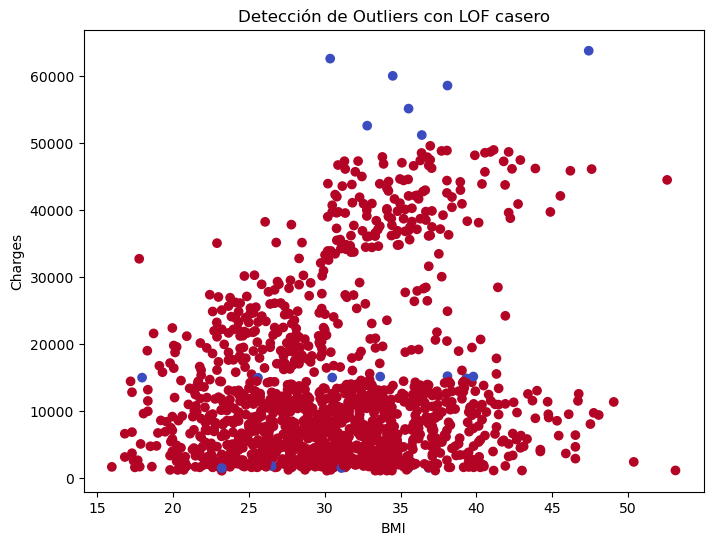

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["bmi"], df["charges"],
            c=df["Outlier_LOF"],
            cmap="coolwarm")
plt.title("Detección de Outliers con LOF casero")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


<div style="border-left:6px solid #b36b00; border-radius:8px; padding:16px; margin-bottom:16px;">
<h3 style="color:#b36b00; margin-top:0;">2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) <span style='font-size:0.8em; color:#888;'>&#128201;</span></h3>
<p style="font-size:1.08em;">
<b>DBSCAN</b> es un algoritmo de clustering basado en densidad que agrupa puntos cercanos y considera como outliers (ruido) aquellos que no pertenecen a ningún grupo. A diferencia de K-means, no requiere especificar el número de clusters previamente.
</p>
<ul style="font-size:1.05em;">
<li>Implementa una <b>clase en Python</b> que contenga el algoritmo DBSCAN y agrégala a tu librería.</li>
<li>Prueba tu implementación con el dataset <code>insurance.csv</code> que se encuentra en la carpeta de Data:</li>
  <ul>
    <li>Detecta los outliers usando tu clase.</li>
    <li>Compara los resultados con el modelo DBSCAN de <code>sklearn</code>.</li>
  </ul>
</ul>
<div style="margin-top:10px; background:#fffbe6; border-left:4px solid #b36b00; padding:10px 18px; border-radius:8px;">
<b>Tip:</b> Explica brevemente las diferencias entre los resultados obtenidos por tu clase y los de <code>sklearn</code>.
</div>
</div>

In [1]:
import pandas as pd
import numpy as np
from HyAIA import DBSCAN

df = pd.read_csv("Data/insurance.csv")

X = df.select_dtypes(include=[np.number])

# DBsCAN 
db = DBSCAN(eps=0.5, min_samples=5)
labels_custom = db.fit_predict(X)

df["cluster_custom"] = labels_custom

In [5]:
from sklearn.cluster import DBSCAN as SK_DBSCAN

db2 = SK_DBSCAN(eps=0.5, min_samples=5)
labels_sklearn = db2.fit_predict(X)

df["cluster_sklearn"] = labels_sklearn

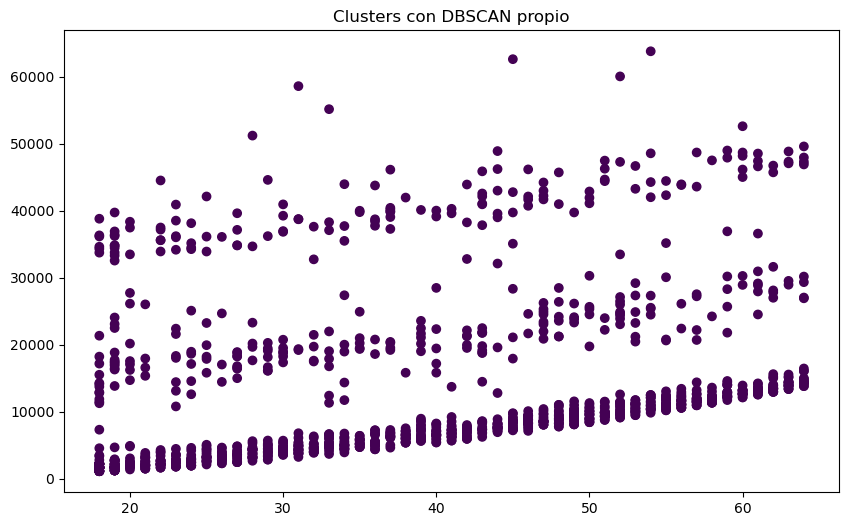

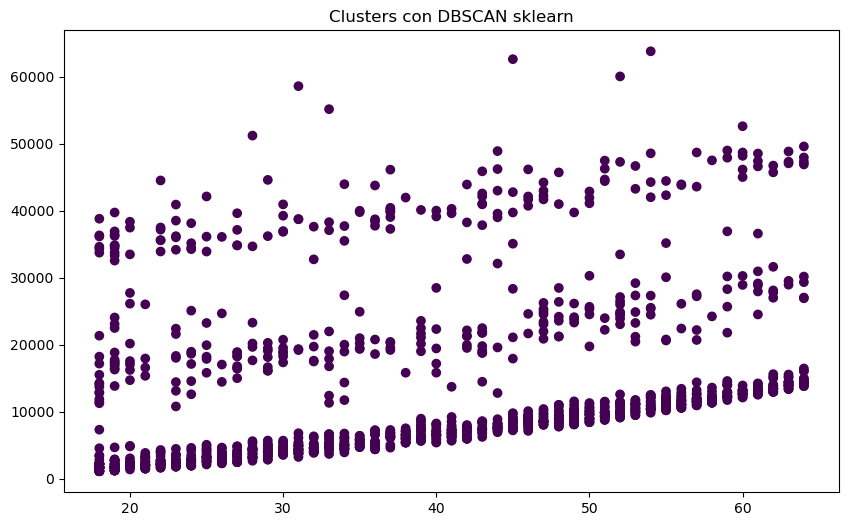

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df["age"], df["charges"], c=df["cluster_custom"])
plt.title("Clusters con DBSCAN propio")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df["age"], df["charges"], c=df["cluster_sklearn"])
plt.title("Clusters con DBSCAN sklearn")
plt.show()